# Setup

In [34]:
import os
os.environ['FIFTYONE_DATABASE_NAME'] = 'fiftyone-teams'
import fiftyone as fo
import fiftyone.core.storage as fos
import matplotlib.pyplot as plt
from PIL import Image

In [1]:
import os
CURRENT_DIR = os.getcwd()
DATA_PATH = os.path.join(CURRENT_DIR, 'Dataset')

print(CURRENT_DIR) 

/home/jovyan/BA/detection


In [2]:
import torch
print(torch._C._cuda_getDeviceCount())

1


In [3]:
num_gpus = torch.cuda.device_count()

print(f"Number of available GPUs: {num_gpus}")

Number of available GPUs: 1


In [4]:
import sys

# Print the current Python version
print(sys.version)

3.9.13 | packaged by conda-forge | (main, May 27 2022, 16:56:21) 
[GCC 10.3.0]


In [5]:
print(torch.__version__)

2.0.1+cu117


In [6]:
from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.42 🚀 Python-3.9.13 torch-2.0.1+cu117 CUDA:0 (NVIDIA GeForce RTX 3090, 24260MiB)
Setup complete ✅ (24 CPUs, 125.7 GB RAM, 231.0/455.9 GB disk)


# Train a model

In [ ]:
from ultralytics import YOLO
import torch

device: str = "cuda" if torch.cuda.is_available() else "cpu"

print(f"device = {device}")
# Load a model
#model = YOLO("yolov9c.yaml")  # build a new model from scratch
model = YOLO('last.pt')  # load a pretrained model (recommended for training)
model.to(device)

# Use the model
model.train(data=f'{DATA_PATH}/data.yaml', epochs=100, imgsz=640, save_period=10, save=True, plots=True, project='exp')  # train the model
metrics = model.val()  # evaluate model performance on the validation set

device = cuda
engine/trainer: task=detect, mode=train, model=last.pt, data=/home/jovyan/BA/detection/Dataset/data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=10, cache=False, device=cuda:0, workers=8, project=exp, name=train4, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_width=None, format=torchscript, keras=F

2024-06-25 19:44:40,501	INFO util.py:159 -- Outdated packages:
  ipywidgets==7.7.0 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2024-06-25 19:44:40,818	INFO util.py:159 -- Outdated packages:
  ipywidgets==7.7.0 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.



                   from  n    params  module                                       arguments                     
  0                  -1  1      1392  ultralytics.nn.modules.conv.Conv             [3, 48, 3, 2]                 
  1                  -1  1     41664  ultralytics.nn.modules.conv.Conv             [48, 96, 3, 2]                
  2                  -1  2    111360  ultralytics.nn.modules.block.C2f             [96, 96, 2, True]             
  3                  -1  1    166272  ultralytics.nn.modules.conv.Conv             [96, 192, 3, 2]               
  4                  -1  4    813312  ultralytics.nn.modules.block.C2f             [192, 192, 4, True]           
  5                  -1  1    664320  ultralytics.nn.modules.conv.Conv             [192, 384, 3, 2]              
  6                  -1  4   3248640  ultralytics.nn.modules.block.C2f             [384, 384, 4, True]           
  7                  -1  1   1991808  ultralytics.nn.modules.conv.Conv             [384

train: Scanning /home/jovyan/BA/detection/yolov9/Dataset/train/labels.cache... 25012 images, 0 backgrounds, 0 corrupt: 100%|██████████| 25012/25012 [00:00<?, ?it/s]
val: Scanning /home/jovyan/BA/detection/yolov9/Dataset/valid/labels.cache... 6254 images, 0 backgrounds, 0 corrupt: 100%|██████████| 6254/6254 [00:00<?, ?it/s]


Plotting labels to exp/train4/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: SGD(lr=0.01, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to exp/train4
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      9.58G     0.9444      1.602      1.139          9        640: 100%|██████████| 1564/1564 [05:14<00:00,  4.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  74%|███████▍  | 146/196 [00:23<00:09,  5.07it/s]

In [ ]:
print("Done")

# Val the model

In [ ]:
from ultralytics import YOLO
model = YOLO(f'{CURRENT_DIR}/exp/train4/weights/best.pt')  # load a custom model
# Validate the model
metrics = model.val()# no arguments needed, dataset and settings remembered
metrics.box.map    # map50-95
metrics.box.map50  # map50
metrics.box.map75  # map75
metrics.box.maps   # a list contains map50-95 of each category

# Load Model 

In [57]:
from ultralytics import YOLO
#model = YOLO(f'{CURRENT_DIR}/exp/train4/weights/best.pt')
model = YOLO(f'{CURRENT_DIR}/best.pt')# load a custom model

# Predict with the Model

## Image

In [61]:
%matplotlib inline 
from matplotlib import pyplot as plt
from PIL import Image
import numpy as np

img = 'test_yolo.png'
img_dir= f'{CURRENT_DIR}/images/{img}'
#img_path ='https://media.karousell.com/media/photos/products/2022/7/7/atari_games_tshirt_1657170966_29aba8f0_progressive.jpg'
#img = Image.open(img_path)

#plt.imshow(np.array(img))
#plt.show()

In [62]:
results = model(img_path, save=True, project='exp', name='test', exist_ok=True) # predict on an image


image 1/1 /home/jovyan/BA/detection/images/test_yolo.png: 640x352 1 Hummel, 5.7ms
Speed: 17.0ms preprocess, 5.7ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 352)
Results saved to exp/test


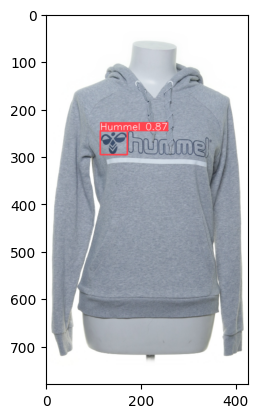

In [63]:
%matplotlib inline 
from matplotlib import pyplot as plt
from PIL import Image
import numpy as np

img_test_dir = f'{CURRENT_DIR}/exp/test/{img}'
img = Image.open(img_test_dir)

plt.imshow(np.array(img))
plt.show()

# Fiftyone

In [30]:
ds = fo.load_dataset("sellpy-test")

In [52]:
#limit = 10000
# get all ids
ds_temp = ds.match(fo.ViewField("Grounding_Dino") !=  None)
print(ds_temp)
ids = ds_temp.values("id")
# check weather the sample contains a logo
contains_logo = ["logo" in values for values in ds_temp.values("Grounding_Dino.detections.label")]
# get ids of sample containing a logo 
ids_contains_logo = np.array(ids)[contains_logo]
# filter the data set to contain only samples with a logo found
ds_with_logos = ds[ids_contains_logo]

Dataset:     sellpy-test
Media type:  image
Num samples: 204676
Sample fields:
    id:             fiftyone.core.fields.ObjectIdField
    filepath:       fiftyone.core.fields.StringField
    tags:           fiftyone.core.fields.ListField(fiftyone.core.fields.StringField)
    metadata:       fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.metadata.ImageMetadata)
    lvl0:           fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Classification)
    lvl1:           fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Classification)
    lvl2:           fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Classification)
    lvl3:           fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Classification)
    size:           fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Classification)
    color:          fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Classification)
    fabric:         fiftyon

In [53]:
import mapper

brands = mapper.get_result_dict()

/home/jovyan/BA/detection
Dataset:     sellpy-test
Media type:  image
Num samples: 204676
Sample fields:
    id:             fiftyone.core.fields.ObjectIdField
    filepath:       fiftyone.core.fields.StringField
    tags:           fiftyone.core.fields.ListField(fiftyone.core.fields.StringField)
    metadata:       fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.metadata.ImageMetadata)
    lvl0:           fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Classification)
    lvl1:           fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Classification)
    lvl2:           fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Classification)
    lvl3:           fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Classification)
    size:           fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Classification)
    color:          fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Classification)
 

In [54]:
all_classes = list(brands.keys())

In [55]:
dataset_model_classes = ds_with_logos.match(fo.ViewField("brand.label").is_in(all_classes))

In [67]:
for sample in dataset_model_classes:
    brand  = (sample.brand.label).capitalize()
    print(f' Brand: {brand}')
    img = Image.open(sample.get_local_path("filepath"))
    plt.imshow(img)
    plt.axis('off')
    plt.show()
    results = model(img, save=True, project='exp', name='test', exist_ok=True)
    result.class
    break

SyntaxError: invalid syntax (3790587415.py, line 9)

In [ ]:
# Useful
# https://github.com/ultralytics/ultralytics/issues/9414